### DEEP LEARNING CLASSIFICATION

In [174]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [201]:
data = pd.read_csv('features/features_set_8.csv')
data.dropna()

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,neu_score,cosine_similarity
0,20716,A long time ago when I was in third grade I h...,34.0,708,39,3.669492,233,0.105932,0.231638,0.069209,0.225989,0.036723,0.057,0.125,0.818,0.067189
1,20717,Softball has to be one of the single most gre...,46.0,785,30,3.945223,280,0.014013,0.188535,0.066242,0.207643,0.090446,0.057,0.224,0.719,0.105492
2,20718,"Some people like making people laugh, I love ...",40.0,861,39,3.979094,291,0.011614,0.186992,0.066202,0.202091,0.072009,0.086,0.184,0.730,0.084715
3,20719,"""LAUGHTER"" @CAPS1 I hang out with my friends...",30.0,713,30,3.688640,221,0.021038,0.192146,0.044881,0.217391,0.088359,0.051,0.222,0.727,0.088823
4,20721,Well ima tell a story about the time i got @CA...,26.0,647,26,3.452859,182,0.108192,0.224111,0.066461,0.276662,0.111283,0.051,0.200,0.748,0.136575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,21626,In most stories mothers and daughters are eit...,35.0,863,27,3.997683,309,0.064890,0.208575,0.055620,0.198146,0.082271,0.076,0.185,0.739,0.067341
719,21628,I never understood the meaning laughter is th...,32.0,559,35,3.844365,197,0.066190,0.241503,0.071556,0.184258,0.098390,0.034,0.211,0.755,0.125316
720,21629,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,835,41,4.294611,334,0.076647,0.241916,0.049102,0.204790,0.071856,0.060,0.173,0.767,0.097131
721,21630,Trippin' on fen...,40.0,576,39,4.109375,232,0.039931,0.199653,0.069444,0.187500,0.092014,0.103,0.167,0.731,0.072300


In [202]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [203]:
X.shape

(723, 13)

In [204]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.18 , random_state=0)

In [205]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [206]:
clf = Sequential()

In [213]:
clf.add(Dense(10,activation ='tanh', input_dim = 13))
clf.add(Dense(8,activation ='relu'))
clf.add(Dense(8,activation ='relu'))
clf.add(Dense(100,activation ='softmax'))

In [214]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [215]:
clf.fit(X_train,y_train,batch_size=7,epochs=120)

Epoch 1/120
85/85 [==============================] - 1s 2ms/step - loss: 4.4764 - accuracy: 0.0693
Epoch 2/120
85/85 [==============================] - 0s 2ms/step - loss: 3.5558 - accuracy: 0.0693
Epoch 3/120
85/85 [==============================] - 0s 2ms/step - loss: 3.0137 - accuracy: 0.2162
Epoch 4/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9581 - accuracy: 0.2196
Epoch 5/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9414 - accuracy: 0.2196
Epoch 6/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9360 - accuracy: 0.2196
Epoch 7/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9312 - accuracy: 0.2196
Epoch 8/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9241 - accuracy: 0.2196
Epoch 9/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9201 - accuracy: 0.2196
Epoch 10/120
85/85 [==============================] - 0s 2ms/step - loss: 2.9139 - accuracy: 0.2196
Epoch 11/

In [216]:
y_prediction = clf.predict(X_test)

In [217]:
y_prediction

array([[1.7890397e-06, 1.9080478e-06, 1.9232127e-06, ..., 1.4306272e-06,
        1.9644617e-06, 2.1488140e-06],
       [1.7175668e-06, 1.8275348e-06, 1.8392776e-06, ..., 1.3717724e-06,
        1.8964774e-06, 2.0575135e-06],
       [2.0648363e-08, 1.2036299e-08, 7.3814528e-09, ..., 2.0135911e-08,
        3.5015020e-08, 8.9744034e-09],
       ...,
       [2.0648402e-08, 1.2036321e-08, 7.3814528e-09, ..., 2.0135911e-08,
        3.5015020e-08, 8.9744034e-09],
       [2.0648402e-08, 1.2036321e-08, 7.3814528e-09, ..., 2.0135911e-08,
        3.5015020e-08, 8.9744034e-09],
       [2.0648402e-08, 1.2036321e-08, 7.3814528e-09, ..., 2.0135911e-08,
        3.5015020e-08, 8.9744034e-09]], dtype=float32)

In [218]:
y_pred = np.argmax(y_prediction, axis=1)

In [219]:
y_pred.shape

(131,)

In [220]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

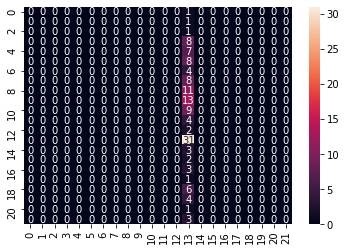

In [221]:
sns.heatmap(cm, annot=True)

In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.2366412213740458

In [223]:
# 1. 0.52 
# 2. 0.53 
# 3. 0.71 
# 4.
# 5. 0.64
# 6. 0.64
# 7. 0.18
# 8. 0.24